In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [19]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
tips_df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [21]:
tips_df.duplicated().sum()

1

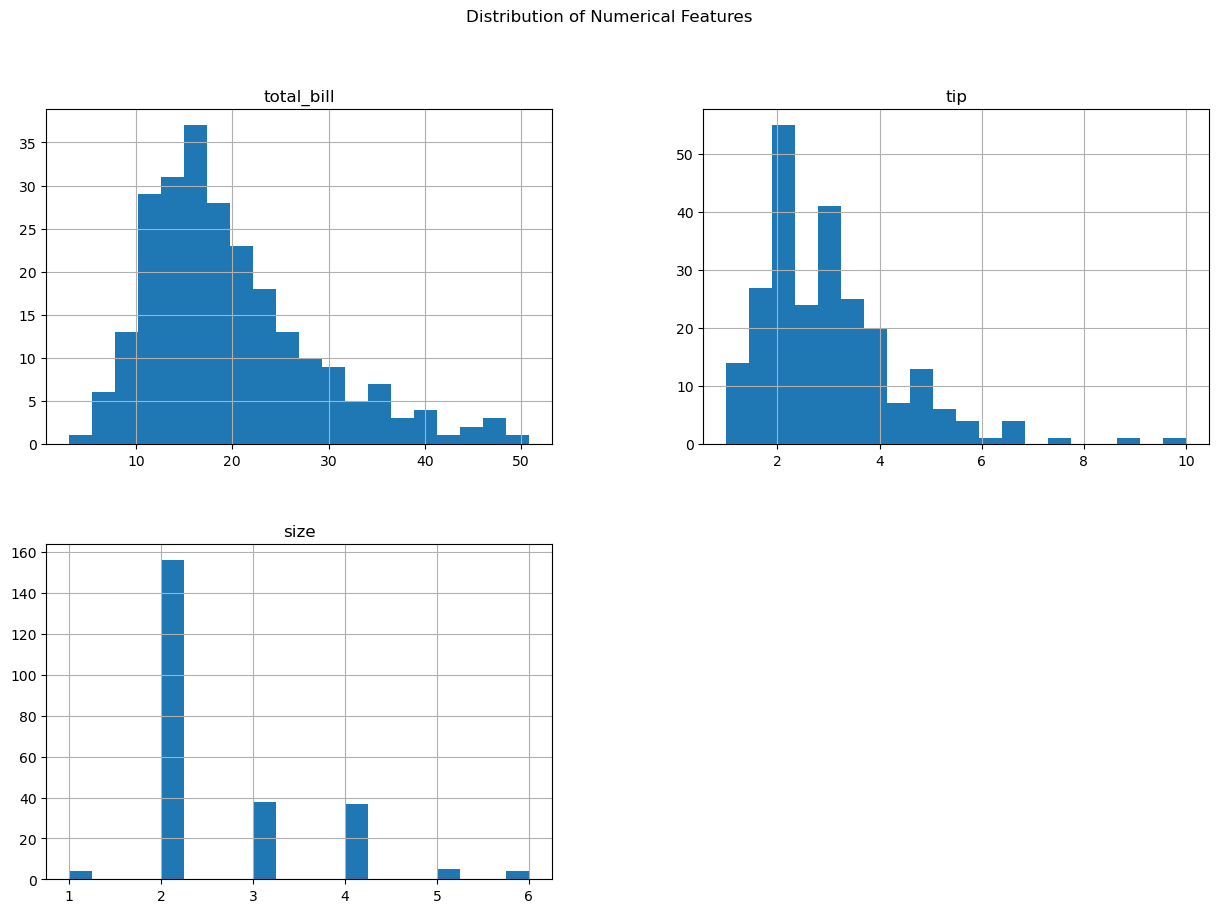

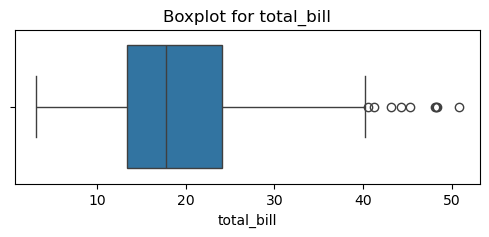

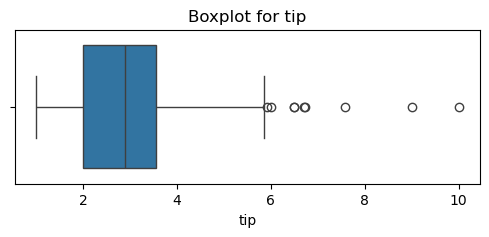

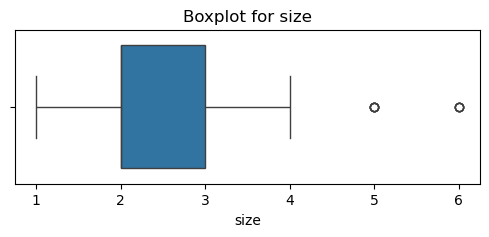

In [22]:
# Histogram of numerical columns
tips_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

# Boxplot to detect outliers
numeric_cols = tips_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=tips_df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

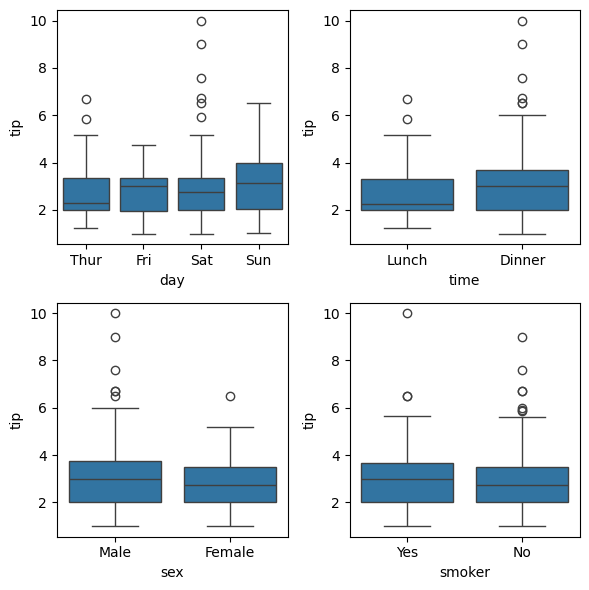

In [25]:
# Box plots for categorical variables
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
sns.boxplot(x='day', y='tip', data=tips_df, ax=axes[0, 0])
sns.boxplot(x='time', y='tip', data=tips_df, ax=axes[0, 1])
sns.boxplot(x='sex', y='tip', data=tips_df, ax=axes[1, 0])
sns.boxplot(x='smoker', y='tip', data=tips_df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [26]:
# Categorical encoding for 'sex', 'smoker', and 'time'
tips_df['sex'] = tips_df['sex'].cat.codes
tips_df['smoker'] = tips_df['smoker'].cat.codes
tips_df['time'] = tips_df['time'].cat.codes

# One-hot encoding for 'day'
tips_df = pd.get_dummies(tips_df, columns=['day'], prefix='day')

tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,1,1,1,2,False,False,False,True
1,10.34,1.66,0,1,1,3,False,False,False,True
2,21.01,3.50,0,1,1,3,False,False,False,True
3,23.68,3.31,0,1,1,2,False,False,False,True
4,24.59,3.61,1,1,1,4,False,False,False,True


In [27]:
corr_matrix = tips_df.corr()

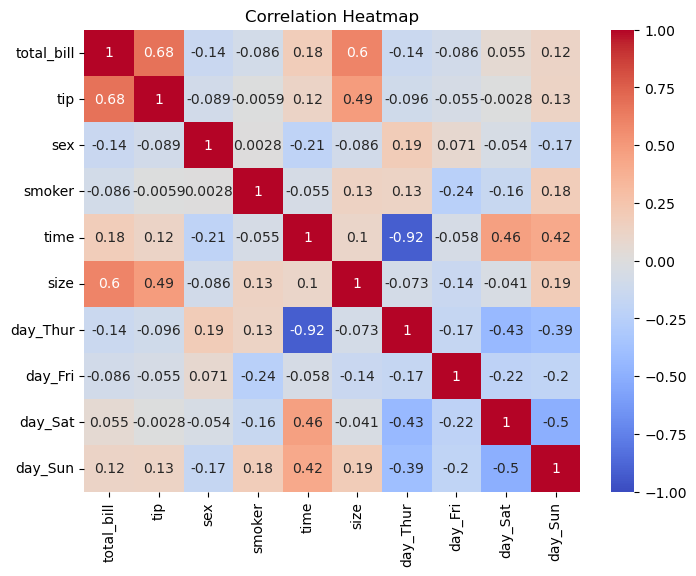

In [28]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
# Print correlations with 'tip'
corr_matrix['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
day_Sun       0.125114
time          0.121629
day_Sat      -0.002790
smoker       -0.005929
day_Fri      -0.055463
sex          -0.088862
day_Thur     -0.095879
Name: tip, dtype: float64

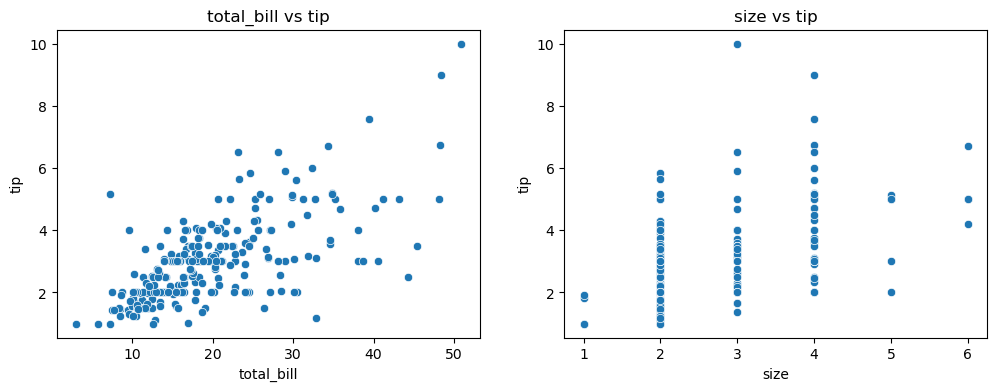

In [31]:
numerical_features = ['total_bill', 'size']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, feature in enumerate(numerical_features):
    sns.scatterplot(x=feature, y='tip', data=tips_df, ax=axes[i])
    axes[i].set_title(f'{feature} vs tip')

In [32]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun']
X_selected = tips_df[selected_features]

print("Selected features:", X_selected.columns)

Selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun'], dtype='object')


In [33]:
tips_df['tip_percentage'] = tips_df['tip'] / tips_df['total_bill'] * 100

tips_df['per_person_total'] = tips_df['total_bill'] / tips_df['size']

tips_df['is_weekend'] = tips_df['day_Sat'] | tips_df['day_Sun']



In [35]:
tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True


In [36]:
tips_df['party_size_category'] = pd.cut(tips_df['size'], bins=[0, 3, 6, np.inf], labels=['Small', 'Medium', 'Large'])
tips_df = pd.get_dummies(tips_df, columns=['party_size_category'], prefix='party')

In [37]:
tips_df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun,tip_percentage,per_person_total,is_weekend,party_Small,party_Medium,party_Large
0,16.99,1.01,1,1,1,2,False,False,False,True,5.944673,8.495000,True,True,False,False
1,10.34,1.66,0,1,1,3,False,False,False,True,16.054159,3.446667,True,True,False,False
2,21.01,3.50,0,1,1,3,False,False,False,True,16.658734,7.003333,True,True,False,False
3,23.68,3.31,0,1,1,2,False,False,False,True,13.978041,11.840000,True,True,False,False
4,24.59,3.61,1,1,1,4,False,False,False,True,14.680765,6.147500,True,False,True,False


In [38]:
selected_features = ['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage', 'per_person_total', 'is_weekend'] + [col for col in tips_df.columns if col.startswith('party_')]
X_selected = tips_df[selected_features]

print("Updated selected features:", X_selected.columns)

Updated selected features: Index(['total_bill', 'size', 'time', 'day_Sat', 'day_Sun', 'tip_percentage',
       'per_person_total', 'is_weekend', 'party_Small', 'party_Medium',
       'party_Large'],
      dtype='object')
